In [2]:
import pandas as pd
import numpy as np

In [3]:
movies_filtered = pd.read_csv('../Intermediate_data/filtered_movies_genre.csv',index_col= 0)

In [4]:
movies_filtered.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,1626,Fire Down Below (1997),1997-09-05,Félix Enríquez Alcalá,"Steven Seagal, Marg Helgenberger, Stephen Lang...",119123,14289.0,"['Action', 'Drama', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0
1,106491,47 Ronin (2013),2013-12-25,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki, R...",1335975,64686.0,"['Action', 'Adventure', 'Fantasy']",1,1,...,0,0,0,0,0,0,0,0,0,0
2,85414,Source Code (2011),2011-04-01,Duncan Jones,"Jake Gyllenhaal, Michelle Monaghan, Vera Farmi...",945513,45612.0,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Thri...",1,0,...,0,0,0,1,0,1,1,0,0,0
3,124805,Venus & Vegas (2010),2010-11-01,Demian Lichtenstein,"Eddie Kaye Thomas,Donald Faison,Eddie Guerra,J...",423474,68716.0,"['Action', 'Comedy']",1,0,...,0,0,0,0,0,0,0,0,0,0
4,144514,Quick (2011),2011-07-21,Beom-gu Cho,"Yoo Seung-Mok,Yoon Je-moon,Kim Tae-woo,Lee Min...",2007413,77175.0,"['Action', 'Comedy', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
movies_filtered.shape

(22351, 28)

In [6]:
train_subset  = pd.read_csv('../Intermediate_data/train_subset.csv', index_col= 0)

/Users/pranavlal/Library/Python/2.7/lib/python/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
train_subset.head()

,userId,movieId,rating,timestamp,year
25352,127137,115824,4.5,2017-12-31 23:59:50,2017
25353,142748,2762,5.0,2017-12-31 23:59:41,2017
25354,196198,1198,3.5,2017-12-31 23:59:17,2017
25355,142748,71057,4.5,2017-12-31 23:58:09,2017
25356,142748,152077,5.0,2017-12-31 23:57:32,2017


In [8]:
train_subset = train_subset.reset_index()

In [9]:
train_new = train_subset.merge(movies_filtered, how = 'inner', left_on = 'movieId', right_on = 'movieId' )

In [10]:
train_new.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0


In [11]:
train_new.shape, train_subset.shape , movies_filtered.shape

((1200795, 33), (1993188, 6), (22351, 28))

In [12]:
len(train_new['movieId'].unique()), len(train_new['userId'].unique())

(17035, 19203)

In [13]:
UM= train_new.pivot(index='userId', columns='movieId', values='rating')
UM_matrix = np.matrix(UM.values)

In [14]:
UM_matrix.shape

(19203, 17035)

In [15]:
from scipy.sparse import csr_matrix
UM_matrix_sparse = csr_matrix(UM.values)

In [16]:
import CollabFiltering as CF

In [17]:
p,q = CF.SVD(UM_matrix)

In [22]:
def rmse(p,q,UM):

    UM_pred =  np.dot(p,q.T)
    subt = np.subtract(UM_matrix,UM_pred)
    RMSE = np.sqrt(np.square(subt[~np.isnan(subt)]).mean())

    return(RMSE)

In [23]:
RMSE = rmse(p,q,UM_matrix)

In [24]:
RMSE

1.0759949249405028

### Clustering model on the reduced dimension
Clustering at User level on p matrix

In [25]:
from sklearn.mixture import GaussianMixture as GMM

In [26]:
gmm_fit = GMM(n_components=4).fit(p)

In [27]:
prediction_gmm = gmm_fit.predict(p)
probs = gmm_fit.predict_proba(p)


In [28]:
probs[[0]]

array([[0.74209329, 0.10780863, 0.09299075, 0.05710733]])

In [29]:
user_cluster = pd.DataFrame({'userId': UM.index , 'cluster': prediction_gmm })

In [30]:
user_cluster.head()

,cluster,userId
0,0,100032
1,0,100036
2,0,100053
3,2,100057
4,0,100058


In [31]:
import matplotlib.pyplot as plt 

In [32]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(p)
          for n in n_components]

Text(0.5,0,'n_components')

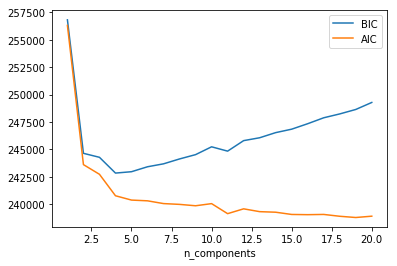

In [33]:
plt.plot(n_components, [m.bic(p) for m in models], label='BIC')
plt.plot(n_components, [m.aic(p) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

---
Merging this data to the training dataset

In [34]:
train_clusters = train_new.merge(user_cluster,how = 'left' , left_on= 'userId', right_on= 'userId')

In [35]:
train_clusters.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan,cluster
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,0
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,1
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,0
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,0


In [36]:
user_cluster['cluster'].value_counts()

0    7010
3    5001
1    4635
2    2557
Name: cluster, dtype: int64

In [37]:
genres_lst = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

In [38]:
train_clusters.groupby('cluster')[genres_lst].sum().T/user_cluster['cluster'].value_counts()

,0,1,2,3
Action,28.847076,16.256958,26.614783,24.015797
Adventure,23.500713,13.992017,21.416113,20.942811
Animation,8.255920,4.943689,7.127102,7.625475
Children,7.876462,4.845092,6.859992,7.817636
Comedy,23.154066,14.403883,21.391865,19.828634
Crime,15.166191,8.589644,14.296441,10.728454
Documentary,0.590442,0.473139,0.657411,0.337333
Drama,30.756776,18.682201,29.283144,22.785443
Fantasy,12.541940,7.642503,11.426281,11.248750
Film-Noir,0.810984,0.388781,0.819711,0.387123


In [39]:
train_clusters.columns

Index([u'index', u'userId', u'movieId', u'rating', u'timestamp', u'year',
       u'title', u'releaseDate', u'directedBy', u'starring', u'imdbId',
       u'tmdbId', u'genres', u'Action', u'Adventure', u'Animation',
       u'Children', u'Comedy', u'Crime', u'Documentary', u'Drama', u'Fantasy',
       u'Film-Noir', u'Horror', u'IMAX', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western', u'nan', u'cluster'],
      dtype='object')

In [40]:
user_cluster.to_csv('../Intermediate_data/user_clusters.csv')

In [71]:
train_clusters.to_csv('../Intermediate_data/train_clusters.csv')